# Important Notes from Chapter 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Solving linear regression using Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [5]:
# concatenate the 2 vectors vertically.
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance.

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best 

array([[3.9792384 ],
       [3.09338149]])

## Effect of feature's scale on cost function.

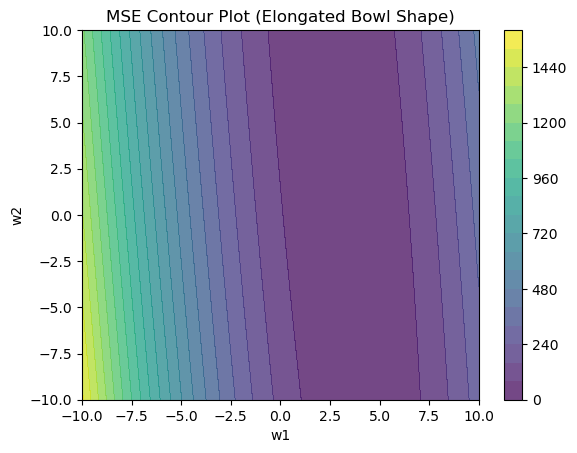

In [13]:
# Create synthetic dataset
np.random.seed(42)
m = 100
x1 = 5 * np.random.rand(m, 1)       # Feature 1: larger scale
x2 = 0.5 * np.random.rand(m, 1)     # Feature 2: smaller scale
y = 3 * x1 + 4 * x2 + np.random.randn(m, 1)

X = np.hstack((x1, x2))

# Calculate mean squared error for different combinations of weights
def mse(w1, w2, X, y):
    y_pred = w1 * X[:, 0:1] + w2 * X[:, 1:2]
    return np.mean((y_pred - y)**2)

w1_vals = np.linspace(-10, 10, 400)
w2_vals = np.linspace(-10, 10, 400)
mse_vals = np.array([[mse(w1, w2, X, y) for w1 in w1_vals] for w2 in w2_vals])

# Plot the contour plot of the mean squared error
plt.contourf(w1_vals, w2_vals, mse_vals, 20, cmap='viridis', alpha=0.75)
plt.colorbar()
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('MSE Contour Plot (Elongated Bowl Shape)')
plt.show()


Therefore, In this example, we create a dataset with two features, $x_1$ and $x_2$, having different scales. Then, we calculate the mean squared error for various combinations of weights $w_1$ and $w_2$ and visualize the results using a contour plot. The elongated bowl shape in the contour plot is evident, with the elongation along the $w_2$ axis due to the smaller scale of feature $x_2$.

When the feature with smaller values (feature 2) has a small scale, a larger change in its associated weight ($w_2$) is required to affect the cost function. This happens because the feature's small scale causes the model to be less sensitive to changes in $w_2$, so the optimization process must make larger adjustments to $w_2$ to minimize the cost function (aka requires larger changes in $w_2$ to affect the cost function)

## Importance of shuffling when using stochastic gradient descent.

When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID), to ensure that the parameters get pulled towards the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not do this, for example if the instances are sorted by label, then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

When training a model using stochastic gradient descent, imagine a scenario where our data is sorted by their labels. For example, the first 100 instances belong to class 1, the next 100 instances belong to class 2, and so on. Since we feed the model one instance at a time, it will initially optimize for the first label. However, once we feed it the 101st instance, which belongs to the second label/class, the model shifts its focus to optimizing for this new class. After being fed 100 instances of the second label, the model struggles to find a balance between the learnings from the first label and the instances from the second label. This pattern continues for each subsequent label. Ultimately, this prevents the model from converging to the global minimum, leading to suboptimal performance.

Few mote notes:

1. The negative impact of feeding sorted data is more pronounced in SGD than in other gradient descent variants (like Batch Gradient Descent or Mini-batch Gradient Descent), as SGD processes instances one at a time, making it more sensitive to the order of the data.
2. In practice, it's common to use mini-batch gradient descent instead of pure SGD, where a small batch of instances is used for each update instead of just one. This approach can provide a balance between the speed of SGD and the stability of batch gradient descent. Shuffling the data remains important in this case, as it helps ensure that each mini-batch contains a representative sample of the overall data distribution.
3. In some cases, when working with time series or other types of sequential data, shuffling may not be appropriate or beneficial, as the order of the data points may carry important information. However, this usually requires using different models and training strategies that can capture the sequential nature of the data, such as Recurrent Neural Networks (RNNs) or Long Short-Term Memory (LSTM) networks

## About `stochastic gradient descent`

Stochastic Gradient Descent (SGD) is an optimization algorithm used to train machine learning models. It has several benefits and drawbacks:

***Benefits***:

1. **Faster convergence**: As it processes one instance at a time, SGD can converge faster than batch gradient descent, which processes the entire dataset in each step.
2. **Memory efficiency**: Due to its instance-by-instance update, SGD is memory-efficient and can be used to train on large datasets that may not fit in memory.
3. **Noise resilience**: The noisy nature of updates in SGD can help escape local minima, potentially leading to better solutions in non-convex optimization problems.
4. **Online learning**: SGD is suitable for online learning, where the model is updated continuously as new data becomes available.

***Drawbacks***:

1. **Sensitivity to data order**: The convergence of SGD is affected by the order of the data points, making it necessary to shuffle the data for optimal performance.
2. **Noisy updates**: The noisy updates in SGD can lead to oscillations in the optimization path, potentially slowing down convergence or causing instability.
3. **Hyperparameter tuning**: SGD often requires careful tuning of hyperparameters like the learning rate and learning rate schedules for optimal performance.
4. **Inefficient parallelization**: Due to its sequential nature, SGD is less amenable to parallelization compared to batch or mini-batch gradient descent.

In summary, SGD offers advantages in terms of speed, memory efficiency, and online learning capabilities, but it can be sensitive to data order, noisy, and require careful hyperparameter tuning. Additionally, it is less suitable for parallelization

## About `Mini-batch gradient descent`

Mini-batch Gradient Descent combines the benefits of both Stochastic Gradient Descent (SGD) and Batch Gradient Descent while addressing some of the problems faced by SGD:

1. **Reduced noise**: By using a small batch of instances instead of a single instance for each update, mini-batch gradient descent reduces the noise in parameter updates compared to pure SGD. This can lead to more stable convergence and smoother optimization paths.
2. **Improved parallelization**: Mini-batch gradient descent can take advantage of modern hardware like GPUs for parallelization, as multiple instances can be processed simultaneously. This can speed up training compared to pure SGD, which processes instances one at a time.
3. **Balanced convergence speed**: Mini-batch gradient descent strikes a balance between the convergence speed of SGD and the stability of batch gradient descent, offering faster convergence than batch gradient descent while still maintaining some of its stability benefits.

Limitations of Mini-batch Gradient Descent:

1. **Hyperparameter tuning**: Like SGD, mini-batch gradient descent requires careful tuning of hyperparameters, such as learning rate, learning rate schedules, and batch size, for optimal performance.
2. **Sensitivity to data order**: Although less sensitive than pure SGD, mini-batch gradient descent can still be affected by the order of data points. It's important to shuffle the data for optimal performance.
3. **Local minima**: While the noisy updates of SGD can sometimes help escape local minima in non-convex optimization problems, mini-batch gradient descent is less noisy, which may make it more prone to getting stuck in local minima compared to pure SGD.

In summary, mini-batch gradient descent addresses some of the problems faced by SGD, such as noisy updates and limited parallelization, while offering a balance between convergence speed and stability. However, it still requires hyperparameter tuning and can be sensitive to data order, and it may be more prone to getting stuck in local minima than pure SGD.

## Detecting underfitting and overfitting using learning curves

Detecting underfitting and overfitting using learning curves and changing the size of the training dataset can be done by observing the performance of your model on both the training and validation datasets as the dataset size changes. Here's how you can do it:

1. **Plot learning curves**:
Learning curves are plots that show the performance of your model on both the training and validation datasets as a function of the dataset size. To create these curves, you can train your model on different subsets of the training dataset and evaluate its performance on the validation dataset. Plot the training and validation errors (or accuracies) against the dataset size.
2. **Analyze the learning curves**:
    - **Underfitting**: If the model is underfitting, the training and validation errors will be high and close together, indicating that the model is not able to capture the underlying patterns in the data. Both curves may plateau or show little improvement as the dataset size increases, suggesting that adding more data may not significantly improve performance.
    - **Overfitting**: If the model is overfitting, the training error will be significantly lower than the validation error, with a large gap between the two curves. This indicates that the model is performing well on the training data but fails to generalize to the validation data. As the dataset size increases, the training error may continue to decrease, but the validation error may stagnate or increase, indicating that the model is memorizing the training data.
3. **Change the size of the training dataset**:
    - **To mitigate underfitting**: If you observe underfitting, try increasing the size of the training dataset, as more data may help the model capture the underlying patterns. However, if the learning curves have plateaued, you may need to consider using a more complex model or improve the features used in the model.
    - **To mitigate overfitting**: If you observe overfitting, try increasing the size of the training dataset. More data can help the model generalize better and reduce the gap between the training and validation errors. If adding more data is not possible or does not help, you can try using regularization techniques, reducing the complexity of the model, or using better feature selection methods

### Ridge Regression

The `SGDRegressor` in the `sklearn.linear_model` module processes the entire dataset in every epoch. In each epoch, the model iterates through all samples in the dataset, updating the model's parameters incrementally based on the gradient of the loss function with respect to each sample.

However, it's important to note that the order in which the samples are processed can have an impact on the convergence of the optimization algorithm. In `SGDRegressor`, the dataset is shuffled by default before each epoch, which can help improve convergence. You can control the shuffling behavior using the `shuffle` parameter when creating an `SGDRegressor` instance:

```python
sgd = SGDRegressor(penalty='l2', alpha=1.0, max_iter=1000, tol=1e-3, shuffle=True, random_state=42)
```

In this example, shuffle=True means that the dataset will be shuffled before each epoch, which is the default behavior. If you set shuffle=False, the dataset will not be shuffled, and the samples will be processed in the order they appear in the dataset. However, it's generally a good idea to keep the default shuffle=True setting, as it can help improve the convergence of the SGD algorithm.

### Importance of Shuffling on Each Epoch

If you shuffle the data once before training and feed it to the model on each epoch without shuffling again, the model will still learn from the data, but the convergence of the optimization algorithm might be slower or less stable.

Shuffling the dataset before each epoch is beneficial for several reasons:

1. **Breaking correlations**: Shuffling helps in breaking any correlation or pattern present in the dataset. If the dataset has some inherent structure or order, it can cause the model to learn biased weights based on that structure. Shuffling the data reduces the chance of this happening.
2. **Better convergence**: By shuffling the data before each epoch, the model is exposed to different combinations of samples during training. This helps the model to explore the solution space more effectively and possibly achieve better convergence.
3. **Preventing overfitting**: Shuffling can help prevent overfitting by ensuring that the model does not rely on any specific ordering of samples to make predictions. It encourages the model to learn more generalized patterns from the data.

However, shuffling the dataset just once and then feeding it to the model without shuffling again in subsequent epochs can still work, especially if the dataset is large enough and well randomized initially. Nevertheless, it is generally a good idea to shuffle the dataset before each epoch to improve the convergence and robustness of the model.

## Clarification: Differences between Ridge and Lasso Regression Convergence and Regularization Effects

Sure, I'll break down the paragraph and explain each part in detail.

1. **Difference in gradients**: The author mentions that there are two main differences between Ridge and Lasso regression. The first difference is related to the gradients of the cost function. In Ridge regression, the gradients get smaller as the parameters approach the global optimum. This means that, as the model converges towards the optimal solution, the steps taken by gradient descent become smaller, which helps the model converge more smoothly. This is in contrast to Lasso regression, where the gradient descent may not have the same smooth convergence.
2. **Bouncing around**: The phrase "no bounding around" refers to the fact that in Ridge regression, the gradient descent algorithm does not overshoot the optimal solution as it converges. Due to the nature of the Ridge cost function, the algorithm takes smaller steps as it gets closer to the optimal parameters, which prevents it from overshooting and oscillating around the solution. 
   
   Lasso regression uses L1 regularization, which adds the absolute values of the model parameters to the cost function. The L1 regularization term is not differentiable at zero, which leads to non-smooth behavior in the cost function. When the gradient descent algorithm encounters this non-smooth behavior, it can result in irregular convergence patterns
3. **Optimal parameters with increasing alpha**: The second difference mentioned in the paragraph is related to the behavior of the optimal parameters as the regularization strength (alpha) is increased. In Ridge regression, when alpha is increased, the optimal parameters get closer to the origin (i.e., they become smaller), but they never get eliminated entirely. This is because Ridge regression uses L2 regularization, which only shrinks the parameters but does not set them exactly to zero.

In contrast, Lasso regression uses L1 regularization, which has the property of promoting sparsity in the model parameters. When alpha is increased in Lasso regression, some of the parameters are effectively set to zero, leading to feature selection. This is the main difference between Ridge and Lasso regression in terms of their effect on the model parameters.

To summarize, the paragraph explains two main differences between Ridge and Lasso regression:

1. The gradients of the cost function in Ridge regression get smaller as the model approaches the global optimum, which results in a smoother convergence compared to Lasso regression.
2. As the regularization strength (alpha) is increased, the optimal parameters in Ridge regression get closer to the origin but are never eliminated entirely. In contrast, Lasso regression can set some parameters to zero, promoting sparsity and feature selection

### Understanding Lasso Regression Instability with High-Dimensional Data and Correlated Features

It is mentioned that Lasso regression could behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. Here is why:

Imagine you have a dataset with a large number of features, say 100, but only 50 training instances. In this case, you have more features than data points. Now, Lasso regression performs feature selection by driving some of the coefficients to zero. When there are more features than training instances, Lasso can potentially find multiple solutions that minimize the cost function by selecting different subsets of features. This can make the Lasso regression model unstable, as slight changes in the data could result in entirely different sets of selected features.

Now, let's talk about the case when several features are strongly correlated. Imagine you have two features that are almost identical, like the height of a person in inches and the height of a person in centimeters. In this scenario, Lasso regression faces a dilemma. Since both features contribute similarly to the prediction, Lasso can shrink one feature's coefficient to zero and keep the other, or vice versa. However, it can also distribute the importance between the two correlated features. Due to the non-smooth nature of the L1 penalty, Lasso might arbitrarily choose one feature over the other, making the feature selection process unstable.

In Ridge regression, on the other hand, correlated features tend to share the importance more evenly because of the L2 penalty's smooth nature. This results in a more stable model that is less sensitive to slight changes in the data.

In summary, Lasso regression can behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated because:

1. With more features than instances, Lasso can find multiple solutions by selecting different subsets of features, making the model unstable.
2. With strongly correlated features, Lasso might arbitrarily choose one feature over the other due to the non-smooth nature of the L1 penalty, leading to instability in feature selection.